2024-02-22 18:28:00.275060: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 18:28:00.275189: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 18:28:00.437638: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


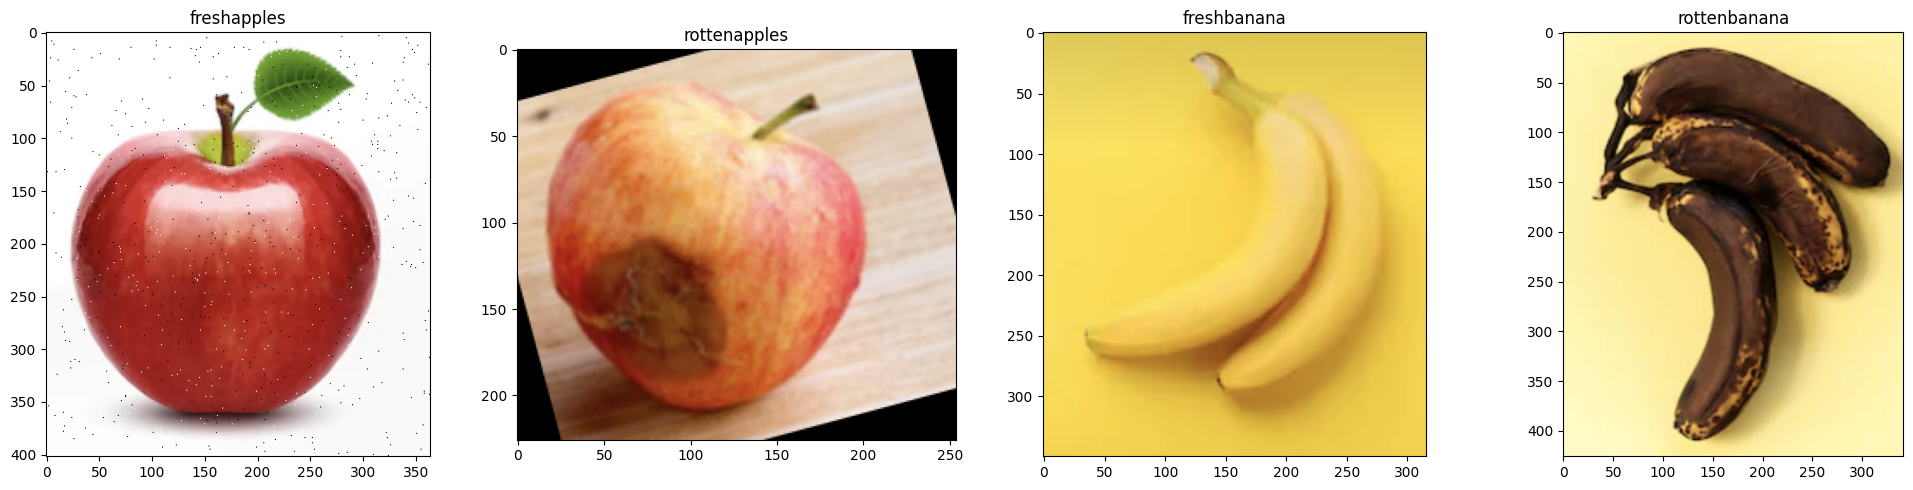

In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

def visualize_sample_images(dataset_dir, categories):
    n = len(categories)
    fig, axs = plt.subplots(1, n, figsize=(20, 5))
    for i, category in enumerate(categories):
        folder = os.path.join(dataset_dir, category)
        image_file = os.listdir(folder)[0]
        img_path = os.path.join(folder, image_file)
        img = load_img(img_path)
        axs[i].imshow(img)
        axs[i].set_title(category)
    plt.tight_layout()
    plt.show()

dataset_base_dir = '/kaggle/input/fresh-and-stale-classification/dataset'  train_dir = os.path.join(dataset_base_dir, 'Train')
categories = ['freshapples', 'rottenapples', 'freshbanana', 'rottenbanana']  visualize_sample_images(train_dir, categories)


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
img_height = 180
img_width = 180

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',     subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')


Found 18901 images belonging to 18 classes.
Found 4718 images belonging to 18 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') ])

model.compile(optimizer='adam',
              loss='binary_crossentropy',                metrics=['accuracy'])

epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)


Epoch 1/10


I0000 00:00:1708626517.465975      90 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


590/590 [==============================] - 408s 678ms/step - loss: -241721380175872.0000 - accuracy: 0.1042 - val_loss: -1500781027000320.0000 - val_accuracy: 0.1048
Epoch 2/10
590/590 [==============================] - 323s 548ms/step - loss: -17572478586978304.0000 - accuracy: 0.1044 - val_loss: -49989532380037120.0000 - val_accuracy: 0.1044
Epoch 3/10
590/590 [==============================] - 316s 536ms/step - loss: -164145901932118016.0000 - accuracy: 0.1045 - val_loss: -321728475360657408.0000 - val_accuracy: 0.1048
Epoch 4/10
590/590 [==============================] - 315s 534ms/step - loss: -699241085473390592.0000 - accuracy: 0.1044 - val_loss: -1127917716838023168.0000 - val_accuracy: 0.1042
Epoch 5/10
590/590 [==============================] - 312s 530ms/step - loss: -2001530901116223488.0000 - accuracy: 0.1044 - val_loss: -2865646710112124928.0000 - val_accuracy: 0.1046
Epoch 6/10
590/590 [==============================] - 313s 531ms/step - loss: -4523399907641393152.0000 -

In [4]:
eval_result = model.evaluate(train_generator)
print(f"Training Loss: {eval_result[0]}, Training Accuracy: {eval_result[1]}")


591/591 [==============================] - 247s 418ms/step - loss: -46587345607845740544.0000 - accuracy: 0.1045
Training Loss: -4.658734560784574e+19, Training Accuracy: 0.10449182242155075


In [5]:
from tensorflow.keras.preprocessing import image
import numpy as np

def classify_image(image_path, model):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)     img_array /= 255.0

    predictions = model.predict(img_array)
    if predictions[0] > 0.5:
        print("Rotten")
    else:
        print("Fresh")

# Example usage
image_path = '/kaggle/input/fresh-and-stale-classification/dataset/Train/rottenoranges/Screen Shot 2018-06-12 at 11.18.28 PM.png'  # Change this to the path of your image
classify_image(image_path, model)


1/1 [==============================] - 0s 394ms/step
Rotten
